<a href="https://colab.research.google.com/github/yuripiresalves/ia-uem/blob/main/RandomForest_e_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# carrega os dados
df = pd.read_csv("/content/drive/MyDrive/Youtube-Spam-Dataset.csv")

# mostra as primeiras linhas
df.head()

# deleta as linhas com valores vazios
# SE NAO DELETAR PARECE QUE FICA UM POQUINHO MELHOR O RANDOMFOREST
# df.dropna(inplace=True)

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1


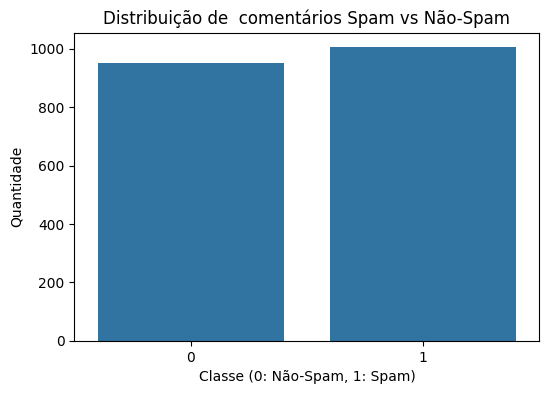

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='CLASS', data=df)
plt.title('Distribuição de  comentários Spam vs Não-Spam')
plt.xlabel('Classe (0: Não-Spam, 1: Spam)')
plt.ylabel('Quantidade')
plt.show()

In [ ]:
# vetiriza a coluna 'CONTENT'
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X = tfidf.fit_transform(df['CONTENT'])
y = df['CLASS']

In [ ]:
# separa os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modelo: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       176
           1       0.97      0.94      0.95       216

    accuracy                           0.95       392
   macro avg       0.95      0.95      0.95       392
weighted avg       0.95      0.95      0.95       392


Acurácia: 0.9489795918367347
-----------------------------


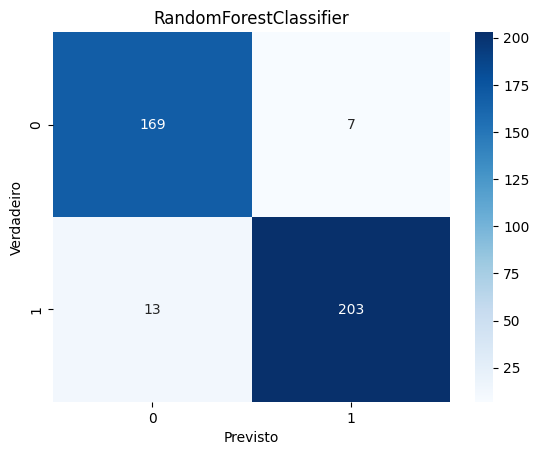


Cross-Validation:

Acurácia média: 0.9560337178349603
Desvio padrão: 0.007476453349474224
----------------------------------------------------------------

Modelo: SVC
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       176
           1       0.98      0.91      0.94       216

    accuracy                           0.94       392
   macro avg       0.94      0.94      0.94       392
weighted avg       0.94      0.94      0.94       392


Acurácia: 0.9362244897959183
-----------------------------


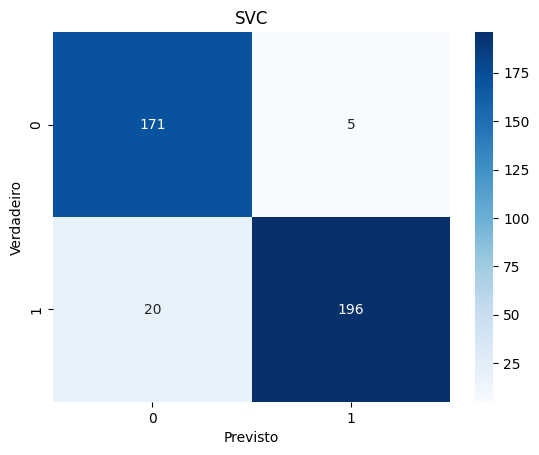


Cross-Validation:

Acurácia média: 0.9412090923325852
Desvio padrão: 0.009274275974960083
----------------------------------------------------------------



In [ ]:
# cria e roda os modelos
models = [
    RandomForestClassifier(random_state=42),
    SVC(random_state=42)
]

# configura cross-validation com kfolds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for model in models:
    # treinar o modelo em todos os dados e plotar a matriz de confusão
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Modelo: {model.__class__.__name__}")
    print(classification_report(y_test, y_pred))
    print("\nAcurácia:", accuracy_score(y_test, y_pred))
    print("-----------------------------")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(model.__class__.__name__)
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.show()

    # avaliar o modelo usando cross-validation
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

    print("\nCross-Validation:")
    print(f"\nAcurácia média: {scores.mean()}")
    print(f"Desvio padrão: {scores.std()}")
    print("----------------------------------------------------------------\n")


Melhores hiperparâmetros do RandomForest: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


              precision    recall  f1-score   support

           0       0.93      0.95      0.94       176
           1       0.96      0.94      0.95       216

    accuracy                           0.95       392
   macro avg       0.95      0.95      0.95       392
weighted avg       0.95      0.95      0.95       392

Acurácia: 0.9489795918367347


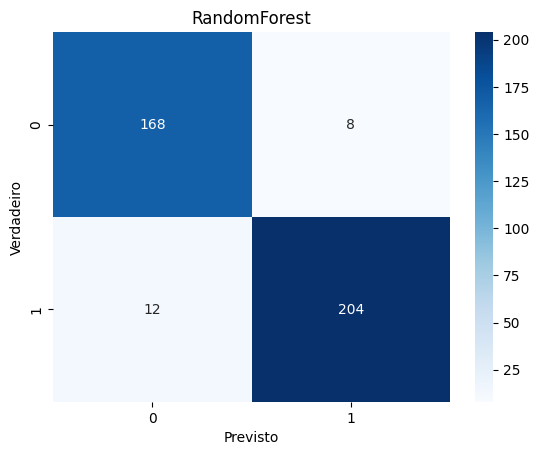


Cross-Validation:

Acurácia média: 0.9545018007202881
Desvio padrão: 0.0037199033809247944


In [ ]:
# gridsearch no randomforest
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)
print("\nMelhores hiperparâmetros do RandomForest:", grid_search.best_params_)
print("\n")
print(classification_report(y_test, y_pred_rf))
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('RandomForest')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

# cross validation
scores = cross_val_score(grid_search.best_estimator_, X, y, cv=kf, scoring='accuracy')
print("\nCross-Validation:")
print(f"\nAcurácia média: {scores.mean()}")
print(f"Desvio padrão: {scores.std()}")


Melhores hiperparâmetros do SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


              precision    recall  f1-score   support

           0       0.92      0.97      0.94       176
           1       0.97      0.93      0.95       216

    accuracy                           0.95       392
   macro avg       0.94      0.95      0.95       392
weighted avg       0.95      0.95      0.95       392

Acurácia: 0.9464285714285714


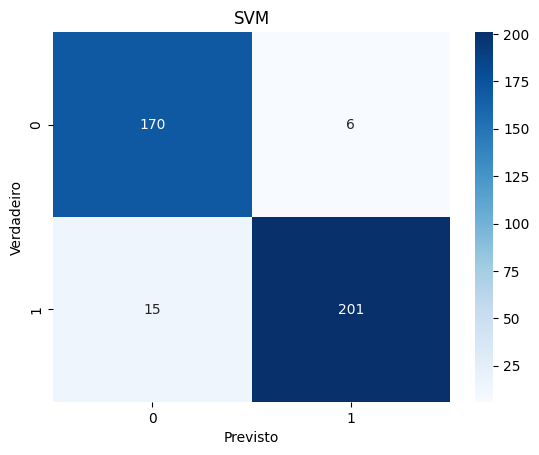


Cross-Validation:

Acurácia média: 0.9473419802703692
Desvio padrão: 0.012380177795129222


In [ ]:
# gridsearch no svm
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid=param_grid, scoring='accuracy', cv=5, verbose=0)
grid_search.fit(X_train, y_train)
y_pred = grid_search.best_estimator_.predict(X_test)

print("\nMelhores hiperparâmetros do SVM:", grid_search.best_params_)
print("\n")
print(classification_report(y_test, y_pred))
print("Acurácia:", accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SVM')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

# cross validation
scores = cross_val_score(grid_search.best_estimator_, X, y, cv=kf, scoring='accuracy')
print("\nCross-Validation:")
print(f"\nAcurácia média: {scores.mean()}")
print(f"Desvio padrão: {scores.std()}")
